In [1]:
#The value of critical temperature Tc can be estimated by analyzing the intersection of U for different N in the plot of U vs. T, 
#This method allows for the determination of Tc without relying on a specific system size
#but instead examining the behavior across multiple system sizes.

In [3]:
from euclidianNetwork import EuclidianNetwork
from isingNetwork import IsingModel
import numpy as np
from tqdm import tqdm

In [ ]:
N_range = np.arange(50, 201, 50)

U = []  #empty list

for N in tqdm(N_range):
    g = EuclidianNetwork(N, 0)
    model = IsingModel(g.get_graph(), temperature_range=np.arange(0,10,0.5))

    model.iterate(simulations=10)
    
    U.append(model.get_data('binder_cumulant'))

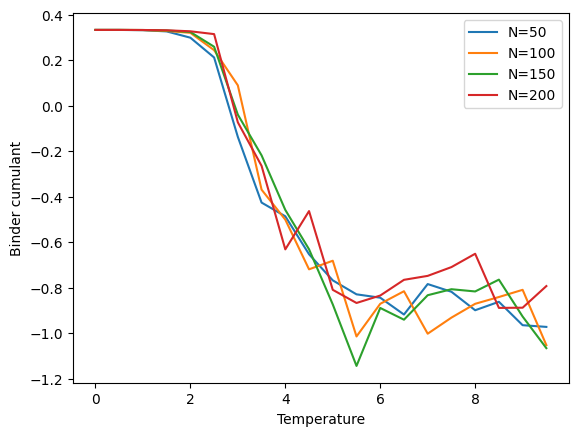

In [5]:
import matplotlib.pyplot as plt

temp_range = model.get_temperature_range()

for i in range(len(U)):
    plt.plot(temp_range, U[i], label='N='+ str(N_range[i]))

plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Binder cumulant')
plt.show()

In [ ]:
# You can save the list U by doing:

np.savez('U(T)_N(50,200).npz', *U)

In [ ]:
#To load the same data:
loaded_data = np.load('U(T)_N(10,100).npz')
loaded_list = [loaded_data[key] for key in loaded_data.keys()]

temp_range = np.arange(0,10,0.1)
N_range = np.arange(10,101,10)

for i in range(len(loaded_list)):
    plt.plot(temp_range, loaded_list[i], label='N='+ str(N_range[i]))

plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Binder cumulant')
plt.show()